In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'/Users/jiwonpark/Desktop/workspace/데이터분석'

In [3]:
ls

Untitled.ipynb                diabetes_predicition.ipynb
bike_demand_prediction.ipynb  heart.csv
data/                         python구현/


In [3]:
df_train = pd.read_csv('data/diabetes/train.csv')
df_test = pd.read_csv('data/diabetes/test.csv')
submission_df= pd.read_csv('data/diabetes/sample_submission.csv')

In [4]:
df_train.isnull().sum()

ID                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
display(df_train)
display(df_test)
display(submission_df)

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...,...
647,TRAIN_647,1,91,64,24,0,29.2,0.192,21,0
648,TRAIN_648,10,122,68,0,0,31.2,0.258,41,0
649,TRAIN_649,8,84,74,31,0,38.3,0.457,39,0
650,TRAIN_650,2,81,72,15,76,30.1,0.547,25,0


,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,TEST_000,5,112,66,0,0,37.8,0.261,41
1,TEST_001,3,107,62,13,48,22.9,0.678,23
2,TEST_002,3,113,44,13,0,22.4,0.140,22
3,TEST_003,6,190,92,0,0,35.5,0.278,66
4,TEST_004,1,107,72,30,82,30.8,0.821,24
...,...,...,...,...,...,...,...,...,...
111,TEST_111,10,111,70,27,0,27.5,0.141,40
112,TEST_112,1,119,54,13,50,22.3,0.205,24
113,TEST_113,3,187,70,22,200,36.4,0.408,36
114,TEST_114,3,100,68,23,81,31.6,0.949,28


,ID,Outcome
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0
...,...,...
111,TEST_111,0
112,TEST_112,0
113,TEST_113,0
114,TEST_114,0


In [5]:
test_id = df_test['ID']

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        652 non-null    object 
 1   Pregnancies               652 non-null    int64  
 2   Glucose                   652 non-null    int64  
 3   BloodPressure             652 non-null    int64  
 4   SkinThickness             652 non-null    int64  
 5   Insulin                   652 non-null    int64  
 6   BMI                       652 non-null    float64
 7   DiabetesPedigreeFunction  652 non-null    float64
 8   Age                       652 non-null    int64  
 9   Outcome                   652 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 51.1+ KB


<AxesSubplot:>

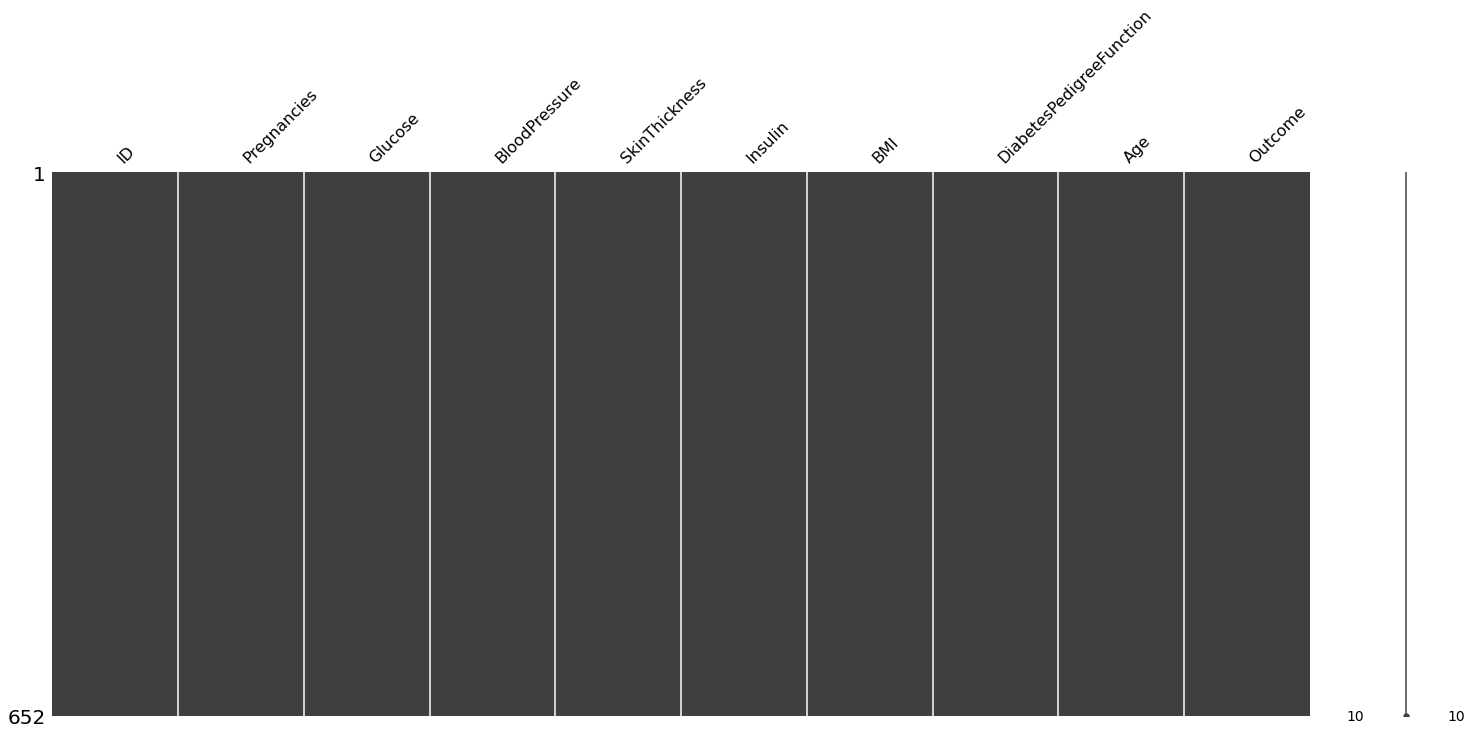

In [9]:
import missingno as msno
msno.matrix(df_train.iloc[:,:])

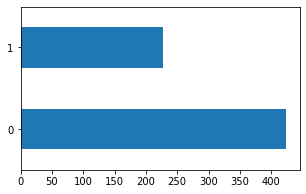

In [8]:
fig, ax = plt.subplots(figsize=(5,3))
df_train['Outcome'].value_counts().plot(kind='barh')
plt.show()

- 결측값은 없지만, 0으로 되어있는 데이터가 존재.

In [10]:
df_train.columns[2:-2]

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction'],
      dtype='object')

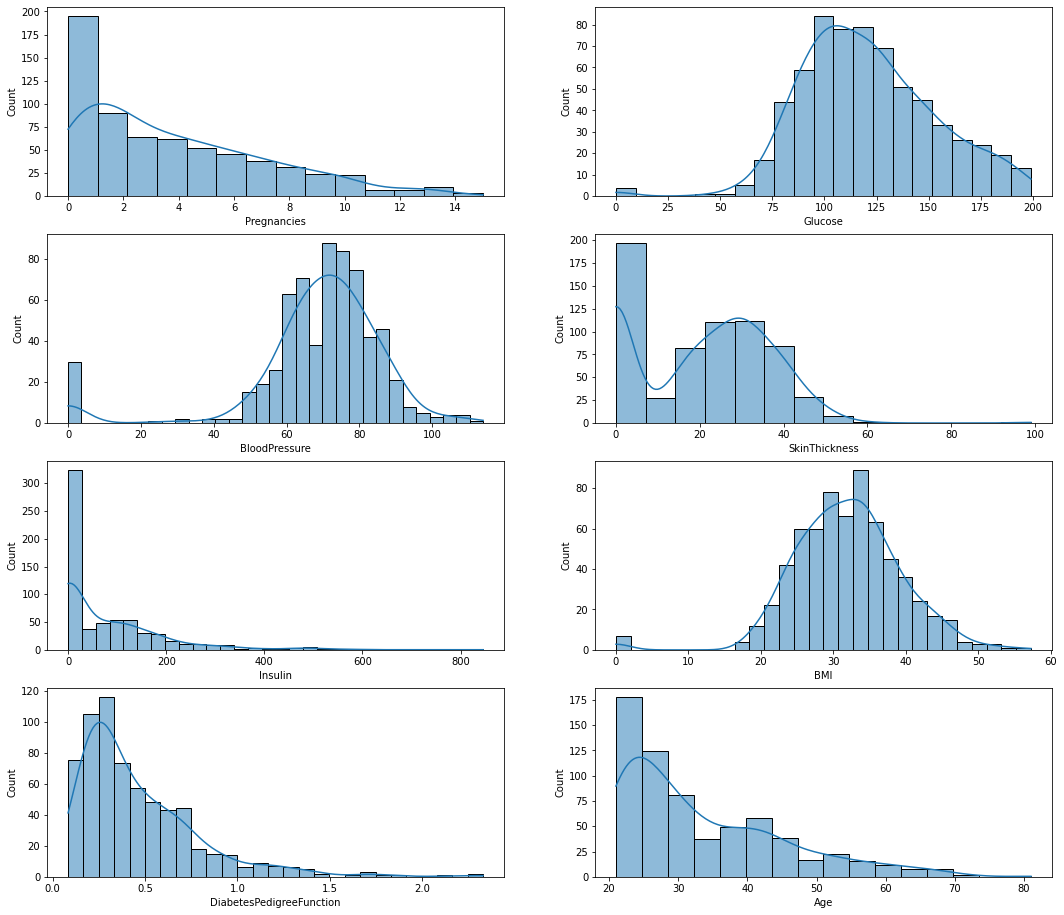

In [11]:
fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(18,16)
sns.histplot(data=df_train, x='Pregnancies',kde=True, ax = ax1)
sns.histplot(data=df_train, x='Glucose',kde=True, ax = ax2)
sns.histplot(data=df_train, x='BloodPressure',kde=True, ax = ax3)
sns.histplot(data=df_train, x='SkinThickness',kde=True, ax = ax4)
sns.histplot(data=df_train, x='Insulin',kde=True, ax = ax5)
sns.histplot(data=df_train, x='BMI',kde=True, ax=ax6)
sns.histplot(data=df_train, x='DiabetesPedigreeFunction',kde=True, ax=ax7)
sns.histplot(data=df_train, x='Age',kde=True, ax=ax8)
plt.show()

In [12]:
col_list = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']
zero_count = []
zero_percent = []
total_average = []
for col in col_list:
    zero_count.append(df_train[df_train[col]==0].shape[0])
    zero_percent.append((df_train[df_train[col]==0].shape[0])/(df_train[df_train[col]==0].shape[1]))
print(zero_count)
print(zero_percent)
pd.DataFrame([zero_count,zero_percent],columns = col_list, index = ['zero_count', 'zero_percent']).T

[4, 30, 195, 318, 7]
[0.4, 3.0, 19.5, 31.8, 0.7]


,zero_count,zero_percent
Glucose,4.0,0.4
BloodPressure,30.0,3.0
SkinThickness,195.0,19.5
Insulin,318.0,31.8
BMI,7.0,0.7


In [13]:
df_train.columns[1:-1].tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [52]:
df_train.groupby(df_train.columns[1:-1].tolist()).mean()

Outcome
Pregnancies Glucose BloodPressure SkinThickness Insulin BMI  DiabetesPedigreeFunction Age         
0           57      60            0             0       21.7 0.735                    67       0.0
            67      76            0             0       45.3 0.194                    46       0.0
            73      0             0             0       21.1 0.342                    25       0.0
            74      52            10            36      27.8 0.269                    22       0.0
            84      64            22            66      35.8 0.545                    21       0.0
...                                                                                            ...
13          153     88            37            140     40.6 1.174                    39       0.0
            158     114           0             0       42.3 0.257                    44       1.0
14          100     78            25            184     36.6 0.412                    46       1.0
            175     62            30            0       33.6 0.212                    38       1.0
15          136     70            32            110     37.1 0.153                    43       1.0

[652 rows x 1 columns]

In [14]:
col_mean = []
for col in df_train.columns[1:-1].tolist():
    col_mean.append(df_train[col].mean())

pd.DataFrame(col_mean,
    index=df_train.columns[1:-1], columns=['mean'])

,mean
Pregnancies,3.923313
Glucose,120.946319
BloodPressure,68.895706
SkinThickness,20.440184
Insulin,80.878834
BMI,31.947393
DiabetesPedigreeFunction,0.465133
Age,33.510736


In [15]:
df_train[col_list].mean()

Glucose          120.946319
BloodPressure     68.895706
SkinThickness     20.440184
Insulin           80.878834
BMI               31.947393
dtype: float64

In [7]:
col_list = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']

df_train[col_list] = df_train[col_list].replace(0, np.nan)
df_train[col_list] = df_train[col_list].replace(np.nan, df_train[col_list].mean())

In [8]:
df_train[col_list].mean()

Glucose          121.692901
BloodPressure     72.218650
SkinThickness     29.161926
Insulin          157.883234
BMI               32.294109
dtype: float64

In [75]:
for col in col_list:
    print("column name:", col, "\nzero values:" ,df_train[df_train[col]==0].shape[0])
    print('-------------------------')

column name: Glucose 
zero values: 0
-------------------------
column name: BloodPressure 
zero values: 0
-------------------------
column name: SkinThickness 
zero values: 0
-------------------------
column name: Insulin 
zero values: 0
-------------------------
column name: BMI 
zero values: 0
-------------------------


---

In [19]:
import warnings
warnings.filterwarnings(action='ignore')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

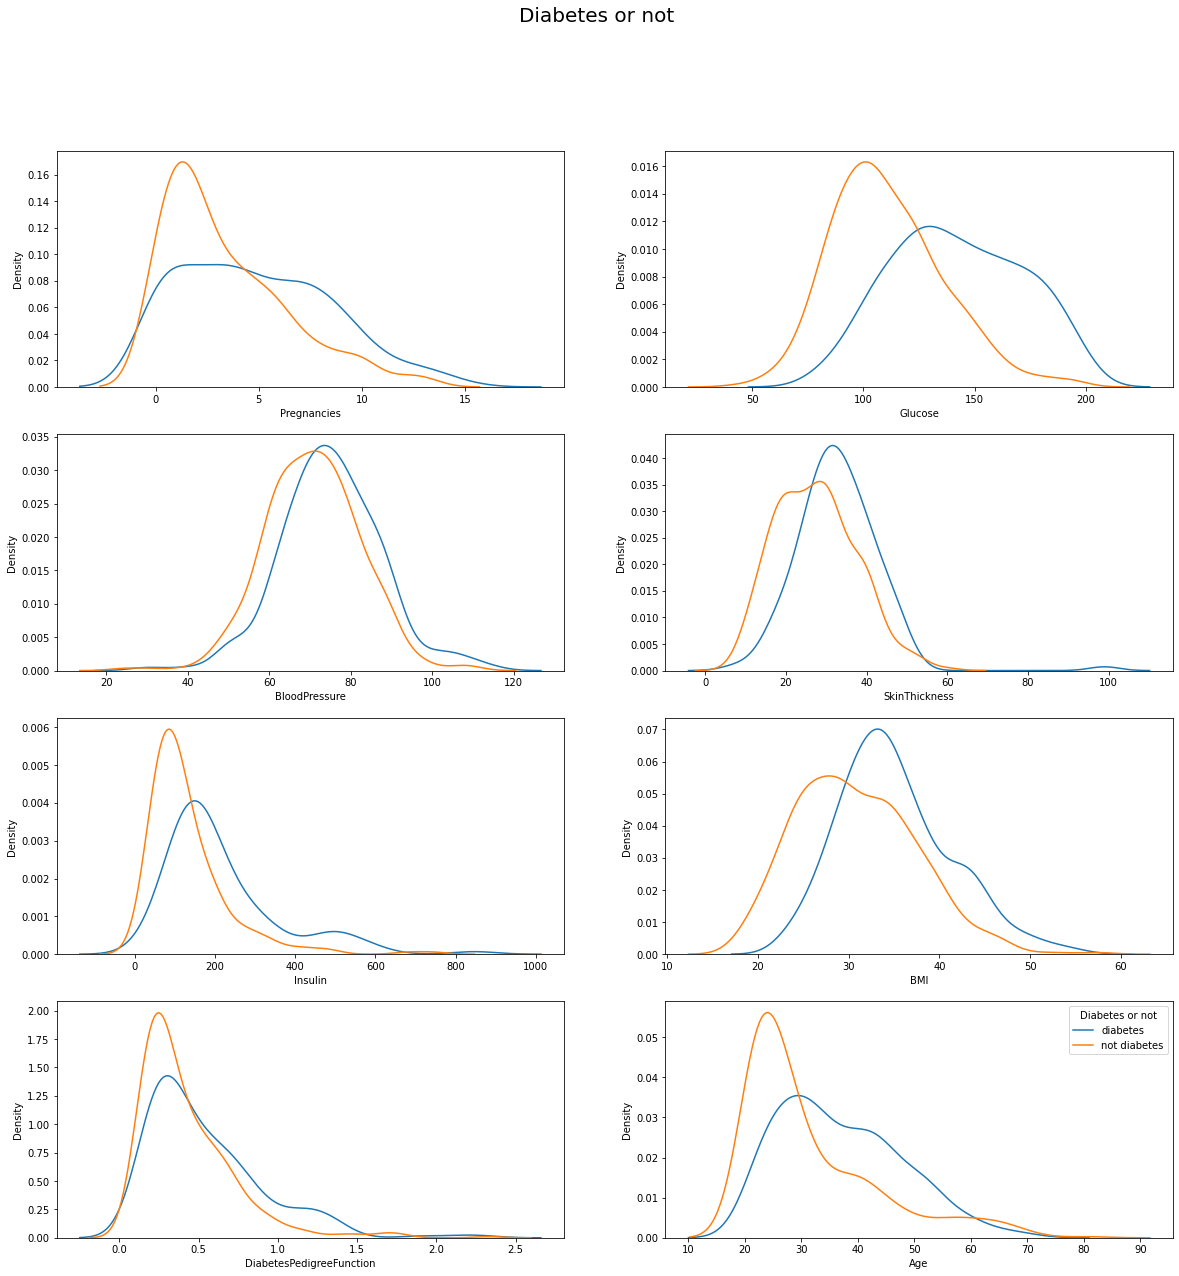

In [20]:
outcome_1 = df_train[df_train['Outcome']==1]
outcome_0 = df_train[df_train['Outcome']==0]

col_nums = 2
row_nums = 4

fig, ax = plt.subplots(ncols=col_nums, nrows=row_nums, figsize=(20, 20))
for i, col in enumerate(df_train.columns[1:-1].tolist()):
    sns.distplot(outcome_1[col], label='diabetes', hist=False, bins=20, ax=ax[int(i/col_nums), int(i%col_nums)])
    sns.distplot(outcome_0[col], label='not diabetes', hist=False, bins=20, ax=ax[int(i/col_nums), int(i%col_nums)])
    plt.legend(title='Diabetes or not')
    
plt.suptitle('Diabetes or not',fontsize=20)
plt.show()

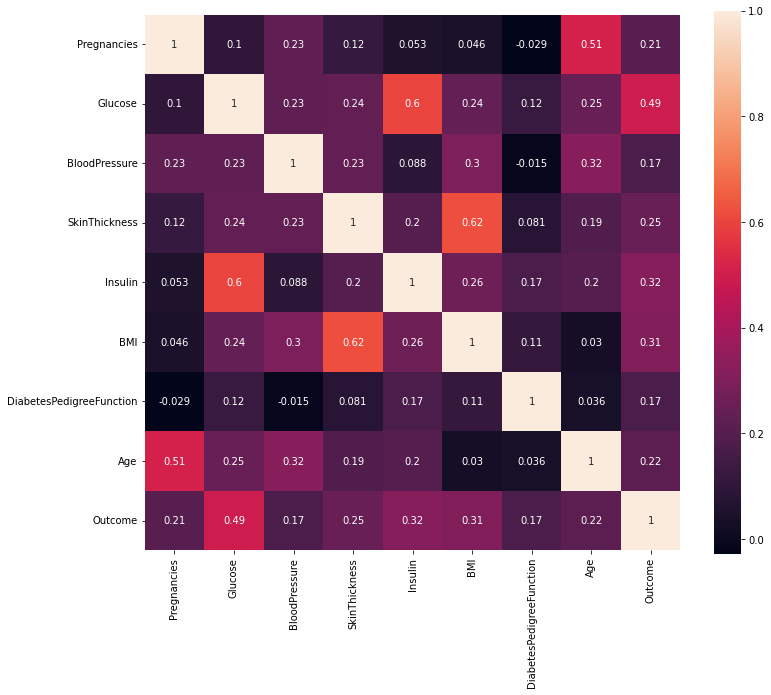

In [23]:
col_list2 = df_train.columns[1:]
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_train[col_list2].corr(), annot=True, square=True)
plt.show()

### 이상치 확인하고 제거하기

----

In [9]:
df_train.isnull().sum()

ID                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [44]:
X = df_train.iloc[:,1:-1]
y = df_train.iloc[:,-1]
test_id = df_test['ID']
X_test = df_test.values

### standscaler 실행

In [45]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#train data 변환
X_train_scaled = scaler.fit_transform(X_train)
#val data 변환
X_val_scaled = scaler.transform(X_val)

In [62]:
print(X_train_scaled.shape)
print(X_val_scaled.shape)
print(y_train.shape)

(521, 8)
(131, 8)
(521,)


In [19]:
def evaluate(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred); print(cm)
    res = []
    TP = cm[1][1]
    FN = cm[1][0]
    TN = cm[0][0]
    FP = cm[0][1]
    res.extend([TP,FN, TN,FP])
    
    accuracy = accuracy_score(y_test, y_pred); print(f'accuracy_score:{accuracy: .3}')
    recall = recall_score(y_test, y_pred); print(f'recall:{recall: .3}')
    precision = precision_score(y_test, y_pred); print(f'precision:{precision: .3}')
    auc = roc_auc_score(y_test, y_pred); print(f'auc:{auc: .3}')
    f1 = f1_score(y_test, y_pred); print(f'f1:{f1: .3}')
    
    return 

-----
### 예측모델

In [35]:
import warnings
warnings.filterwarnings(action='ignore')

In [47]:
#logistic regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_val_scaled)
mean_absolute_score = mean_absolute_error(y_val, lr_pred); print(f'MAE: {mean_absolute_score: .2}')
print(evaluate(y_val, lr_pred))

MAE:  0.24
[[74 14]
 [17 26]]
accuracy_score: 0.763
recall: 0.605
precision: 0.65
auc: 0.723
f1: 0.627
None


In [48]:
from lightgbm import LGBMClassifier
#lgbm
lgbm_model = LGBMClassifier(num_iterations=1000,
                     learning_rate=0.1, 
                      max_depth=4,
                      n_jobs=-1,
                      objective='binary')
lgbm_model.fit(X_train_scaled, y_train,
              eval_set=[(X_val_scaled, y_val)],
              #early_stopping_rounds=25,
              verbose=5,)
              #eval_metric='logloss')

[5]	valid_0's binary_logloss: 0.54257
[10]	valid_0's binary_logloss: 0.501885
[15]	valid_0's binary_logloss: 0.48343
[20]	valid_0's binary_logloss: 0.479495
[25]	valid_0's binary_logloss: 0.485384
[30]	valid_0's binary_logloss: 0.486714
[35]	valid_0's binary_logloss: 0.490636
[40]	valid_0's binary_logloss: 0.496958
[45]	valid_0's binary_logloss: 0.503868
[50]	valid_0's binary_logloss: 0.510087
[55]	valid_0's binary_logloss: 0.516317
[60]	valid_0's binary_logloss: 0.521544
[65]	valid_0's binary_logloss: 0.529327
[70]	valid_0's binary_logloss: 0.527035
[75]	valid_0's binary_logloss: 0.533372
[80]	valid_0's binary_logloss: 0.532482
[85]	valid_0's binary_logloss: 0.535932
[90]	valid_0's binary_logloss: 0.544349
[95]	valid_0's binary_logloss: 0.546211
[100]	valid_0's binary_logloss: 0.547666
[105]	valid_0's binary_logloss: 0.550899
[110]	valid_0's binary_logloss: 0.552533
[115]	valid_0's binary_logloss: 0.557294
[120]	valid_0's binary_logloss: 0.560989
[125]	valid_0's binary_logloss: 0.5664

LGBMClassifier(max_depth=4, num_iterations=1000, objective='binary')

In [49]:
lgbm_predict = lgbm_model.predict(X_val_scaled)
evaluate(y_val, lgbm_predict)

[[68 20]
 [19 24]]
accuracy_score: 0.702
recall: 0.558
precision: 0.545
auc: 0.665
f1: 0.552


In [111]:
from sklearn.model_selection import RandomizedSearchCV

lgbm = LGBMClassifier(tree_method = 'gpu_hist', gpu_id=0)

params = {'n_estimators': [1000, 2000, 3000, 4000],
          'learning_rate': [0.1, 0.05, 0.01],
          'max_depth': [5,7,9],
          'subsample': [0,7, 0.8, 0.9, 1]
         }

evals = [(X_val, y_val)]
lgbm_grid = RandomizedSearchCV(lgbm, param_distributions= params,
                               n_iter=3, scoring="f1", cv=3, refit=True, random_state=42)


lgbm_grid.fit(X_train, y_train.values.ravel(), early_stopping_rounds=100,
              eval_metric="f1", eval_set = evals)

[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: gpu_id
[1]	valid_0's binary_logloss: 0.649411
[2]	valid_0's binary_logloss: 0.624485
[3]	valid_0's binary_logloss: 0.602538
[4]	valid_0's binary_logloss: 0.589279
[5]	valid_0's binary_logloss: 0.574505
[6]	valid_0's binary_logloss: 0.566309
[7]	valid_0's binary_logloss: 0.554167
[8]	valid_0's binary_logloss: 0.546981
[9]	valid_0's binary_logloss: 0.540818
[10]	valid_0's binary_logloss: 0.539095
[11]	valid_0's binary_logloss: 0.535373
[12]	valid_0's binary_logloss: 0.530701
[13]	valid_0's binary_logloss: 0.530348
[14]	valid_0's binary_logloss: 0.529773
[15]	valid_0's binary_logloss: 0.521875
[16]	valid_0's binary_logloss: 0.520715
[17]	valid_0's binary_logloss: 0.51993
[18]	valid_0's binary_logloss: 0.522018
[19]	valid_0's binary_logloss: 0.520097
[20]	valid_0's binary_logloss: 0.523178
[21]	valid_0's binary_logloss: 0.522087
[22]	valid_0's binary_logloss: 0.519151
[23]	valid_0's binary_logloss: 

[4]	valid_0's binary_logloss: 0.585376
[5]	valid_0's binary_logloss: 0.569866
[6]	valid_0's binary_logloss: 0.560389
[7]	valid_0's binary_logloss: 0.553351
[8]	valid_0's binary_logloss: 0.544641
[9]	valid_0's binary_logloss: 0.536476
[10]	valid_0's binary_logloss: 0.52963
[11]	valid_0's binary_logloss: 0.526471
[12]	valid_0's binary_logloss: 0.523044
[13]	valid_0's binary_logloss: 0.52001
[14]	valid_0's binary_logloss: 0.513714
[15]	valid_0's binary_logloss: 0.517181
[16]	valid_0's binary_logloss: 0.513857
[17]	valid_0's binary_logloss: 0.514573
[18]	valid_0's binary_logloss: 0.513984
[19]	valid_0's binary_logloss: 0.515076
[20]	valid_0's binary_logloss: 0.516555
[21]	valid_0's binary_logloss: 0.51666
[22]	valid_0's binary_logloss: 0.514723
[23]	valid_0's binary_logloss: 0.515803
[24]	valid_0's binary_logloss: 0.51545
[25]	valid_0's binary_logloss: 0.518486
[26]	valid_0's binary_logloss: 0.520526
[27]	valid_0's binary_logloss: 0.5238
[28]	valid_0's binary_logloss: 0.523256
[29]	valid_0

[69]	valid_0's binary_logloss: 0.57843
[70]	valid_0's binary_logloss: 0.577369
[71]	valid_0's binary_logloss: 0.576408
[72]	valid_0's binary_logloss: 0.575584
[73]	valid_0's binary_logloss: 0.574585
[74]	valid_0's binary_logloss: 0.573497
[75]	valid_0's binary_logloss: 0.572126
[76]	valid_0's binary_logloss: 0.571472
[77]	valid_0's binary_logloss: 0.570625
[78]	valid_0's binary_logloss: 0.569799
[79]	valid_0's binary_logloss: 0.568925
[80]	valid_0's binary_logloss: 0.568218
[81]	valid_0's binary_logloss: 0.567381
[82]	valid_0's binary_logloss: 0.566144
[83]	valid_0's binary_logloss: 0.565713
[84]	valid_0's binary_logloss: 0.564984
[85]	valid_0's binary_logloss: 0.563803
[86]	valid_0's binary_logloss: 0.563049
[87]	valid_0's binary_logloss: 0.562664
[88]	valid_0's binary_logloss: 0.561415
[89]	valid_0's binary_logloss: 0.560762
[90]	valid_0's binary_logloss: 0.560448
[91]	valid_0's binary_logloss: 0.559646
[92]	valid_0's binary_logloss: 0.559035
[93]	valid_0's binary_logloss: 0.557863
[

[133]	valid_0's binary_logloss: 0.523297
[134]	valid_0's binary_logloss: 0.523324
[135]	valid_0's binary_logloss: 0.522764
[136]	valid_0's binary_logloss: 0.523006
[137]	valid_0's binary_logloss: 0.523145
[138]	valid_0's binary_logloss: 0.522658
[139]	valid_0's binary_logloss: 0.522184
[140]	valid_0's binary_logloss: 0.521724
[141]	valid_0's binary_logloss: 0.521797
[142]	valid_0's binary_logloss: 0.521344
[143]	valid_0's binary_logloss: 0.520752
[144]	valid_0's binary_logloss: 0.520352
[145]	valid_0's binary_logloss: 0.519925
[146]	valid_0's binary_logloss: 0.519509
[147]	valid_0's binary_logloss: 0.519111
[148]	valid_0's binary_logloss: 0.518733
[149]	valid_0's binary_logloss: 0.518351
[150]	valid_0's binary_logloss: 0.518137
[151]	valid_0's binary_logloss: 0.517974
[152]	valid_0's binary_logloss: 0.517776
[153]	valid_0's binary_logloss: 0.517625
[154]	valid_0's binary_logloss: 0.517196
[155]	valid_0's binary_logloss: 0.516862
[156]	valid_0's binary_logloss: 0.516724
[157]	valid_0's 

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(gpu_id=0, tree_method='gpu_hist'),
                   n_iter=3,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [5, 7, 9],
                                        'n_estimators': [1000, 2000, 3000,
                                                         4000],
                                        'subsample': [0, 7, 0.8, 0.9, 1]},
                   random_state=42, scoring='f1')

In [112]:
lgbm_grid.best_params_

{'subsample': 0.9, 'n_estimators': 3000, 'max_depth': 7, 'learning_rate': 0.01}

In [113]:
pred_lgbm = lgbm_grid.predict(X_val)
eval_lgbm = evaluate(y_val, pred_lgbm)
eval_lgbm

[[73  5]
 [28 25]]
accuracy_score: 0.748
recall: 0.472
precision: 0.833
auc: 0.704
f1: 0.602


In [52]:
#catboost
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(iterations=100,
                                    depth=1,learning_rate=.1,
                                    loss_function='Logloss',
                                    verbose=True)
catboost_model.fit(X_train_scaled, y_train)

0:	learn: 0.6722951	total: 686us	remaining: 67.9ms
1:	learn: 0.6541155	total: 1.1ms	remaining: 54.1ms
2:	learn: 0.6380718	total: 1.21ms	remaining: 39.2ms
3:	learn: 0.6263008	total: 1.45ms	remaining: 34.9ms
4:	learn: 0.6156803	total: 1.68ms	remaining: 31.9ms
5:	learn: 0.6061544	total: 1.84ms	remaining: 28.9ms
6:	learn: 0.5981434	total: 1.96ms	remaining: 26ms
7:	learn: 0.5927496	total: 2.2ms	remaining: 25.3ms
8:	learn: 0.5847537	total: 2.39ms	remaining: 24.2ms
9:	learn: 0.5802963	total: 2.51ms	remaining: 22.6ms
10:	learn: 0.5718132	total: 2.68ms	remaining: 21.7ms
11:	learn: 0.5656106	total: 2.86ms	remaining: 21ms
12:	learn: 0.5600199	total: 2.97ms	remaining: 19.9ms
13:	learn: 0.5536076	total: 3.09ms	remaining: 19ms
14:	learn: 0.5505356	total: 3.2ms	remaining: 18.1ms
15:	learn: 0.5457182	total: 3.28ms	remaining: 17.2ms
16:	learn: 0.5406454	total: 3.39ms	remaining: 16.6ms
17:	learn: 0.5366706	total: 3.5ms	remaining: 15.9ms
18:	learn: 0.5322879	total: 3.64ms	remaining: 15.5ms
19:	learn: 0.5

In [53]:
catboost_pred = catboost_model.predict(X_val_scaled)
catboost_eval = evaluate(y_val,catboost_pred)
catboost_eval

[[72 16]
 [18 25]]
accuracy_score: 0.74
recall: 0.581
precision: 0.61
auc: 0.7
f1: 0.595


In [54]:
catboost_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

### submission 만들기

In [20]:
df_test

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,TEST_000,5,112,66,0,0,37.8,0.261,41
1,TEST_001,3,107,62,13,48,22.9,0.678,23
2,TEST_002,3,113,44,13,0,22.4,0.140,22
3,TEST_003,6,190,92,0,0,35.5,0.278,66
4,TEST_004,1,107,72,30,82,30.8,0.821,24
...,...,...,...,...,...,...,...,...,...
111,TEST_111,10,111,70,27,0,27.5,0.141,40
112,TEST_112,1,119,54,13,50,22.3,0.205,24
113,TEST_113,3,187,70,22,200,36.4,0.408,36
114,TEST_114,3,100,68,23,81,31.6,0.949,28


In [24]:
df_test.iloc[:,1:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5,112,66,0,0,37.8,0.261,41
1,3,107,62,13,48,22.9,0.678,23
2,3,113,44,13,0,22.4,0.140,22
3,6,190,92,0,0,35.5,0.278,66
4,1,107,72,30,82,30.8,0.821,24
...,...,...,...,...,...,...,...,...
111,10,111,70,27,0,27.5,0.141,40
112,1,119,54,13,50,22.3,0.205,24
113,3,187,70,22,200,36.4,0.408,36
114,3,100,68,23,81,31.6,0.949,28


In [55]:
X_test_scaled = scaler.transform(df_test.iloc[:,1:])

In [56]:
submission_df

,ID,Outcome
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0
...,...,...
111,TEST_111,0
112,TEST_112,0
113,TEST_113,0
114,TEST_114,0


In [57]:
cat_predict_test = catboost_model.predict(X_test_scaled)

In [58]:
cat_predict_test

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0])

In [60]:
submission_df['Outcome']=cat_predict_test

In [61]:
submission_df

,ID,Outcome
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,1
4,TEST_004,0
...,...,...
111,TEST_111,0
112,TEST_112,0
113,TEST_113,1
114,TEST_114,0
